In [1]:
import numpy as np # Numpy library
import pandas as pd # Pandas library
import matplotlib.pyplot as plt # Matplotlib library for visualisation 
%matplotlib inline
import seaborn as sns # Matplotlib library for visualisation 

import warnings # Import warning liabraries to ignore standard warnings 
warnings.filterwarnings("ignore")



In [3]:
loan_df = pd.read_csv('C:\\Users\\USER\\Downloads\\Data Projects\\Kaggle loan data\\Loan Payments data.csv')
loan_df

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female


In [5]:
#Descriptive statistics for the dataframe
loan_df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
#Brief summary of the dataset. This also checks null values per column
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [7]:
#Check for null values
loan_df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [9]:
#Shape of the dataset
loan_df.shape

(500, 11)

In [10]:
#Exploratory analysis  of the data
#Evaluate the count of loan cases Paid Off, in Collection an d in  Collection_PaidOff status
sns.set(style="whitegrid") #  set background of charts as white 

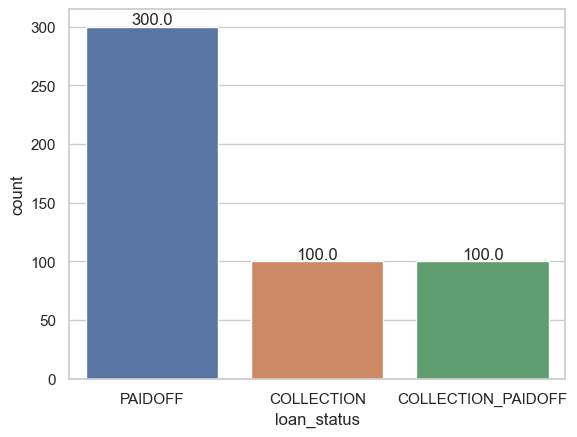

In [13]:
ax = sns.countplot(x = 'loan_status', data=loan_df)

# Annotate the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

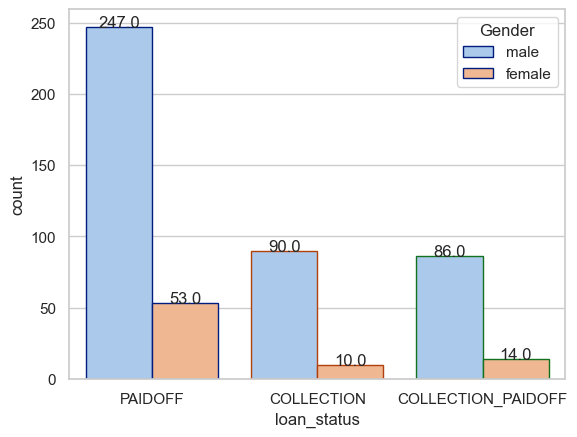

In [31]:
#Let's check the loan status by gender
ax2 = sns.countplot(x="loan_status", data=loan_df , hue='Gender', palette='pastel' , edgecolor=sns.color_palette("dark", 3))

#Annotate the counts of each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,3), textcoords='offset points')
plt.show()


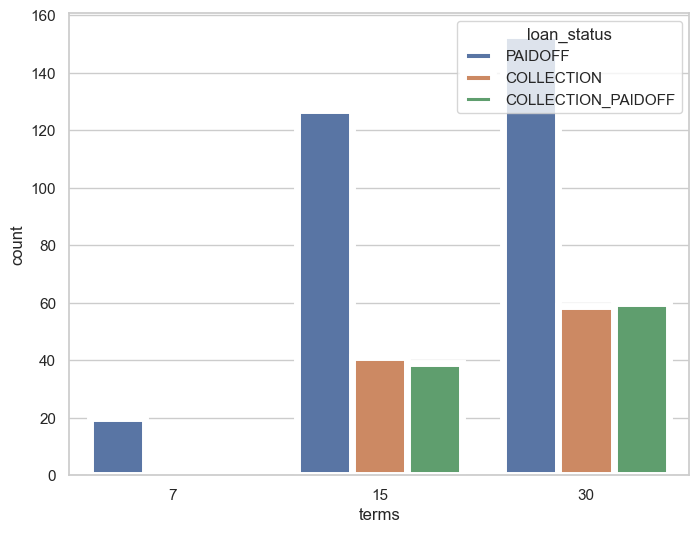

In [34]:
#Let's see the count of loan applications per term 5, 10, 15, 30 (in days)
plt.figure(figsize=(8, 6))
ax3 = sns.countplot(x="terms", data=loan_df, hue='loan_status', palette='deep', linewidth=5)




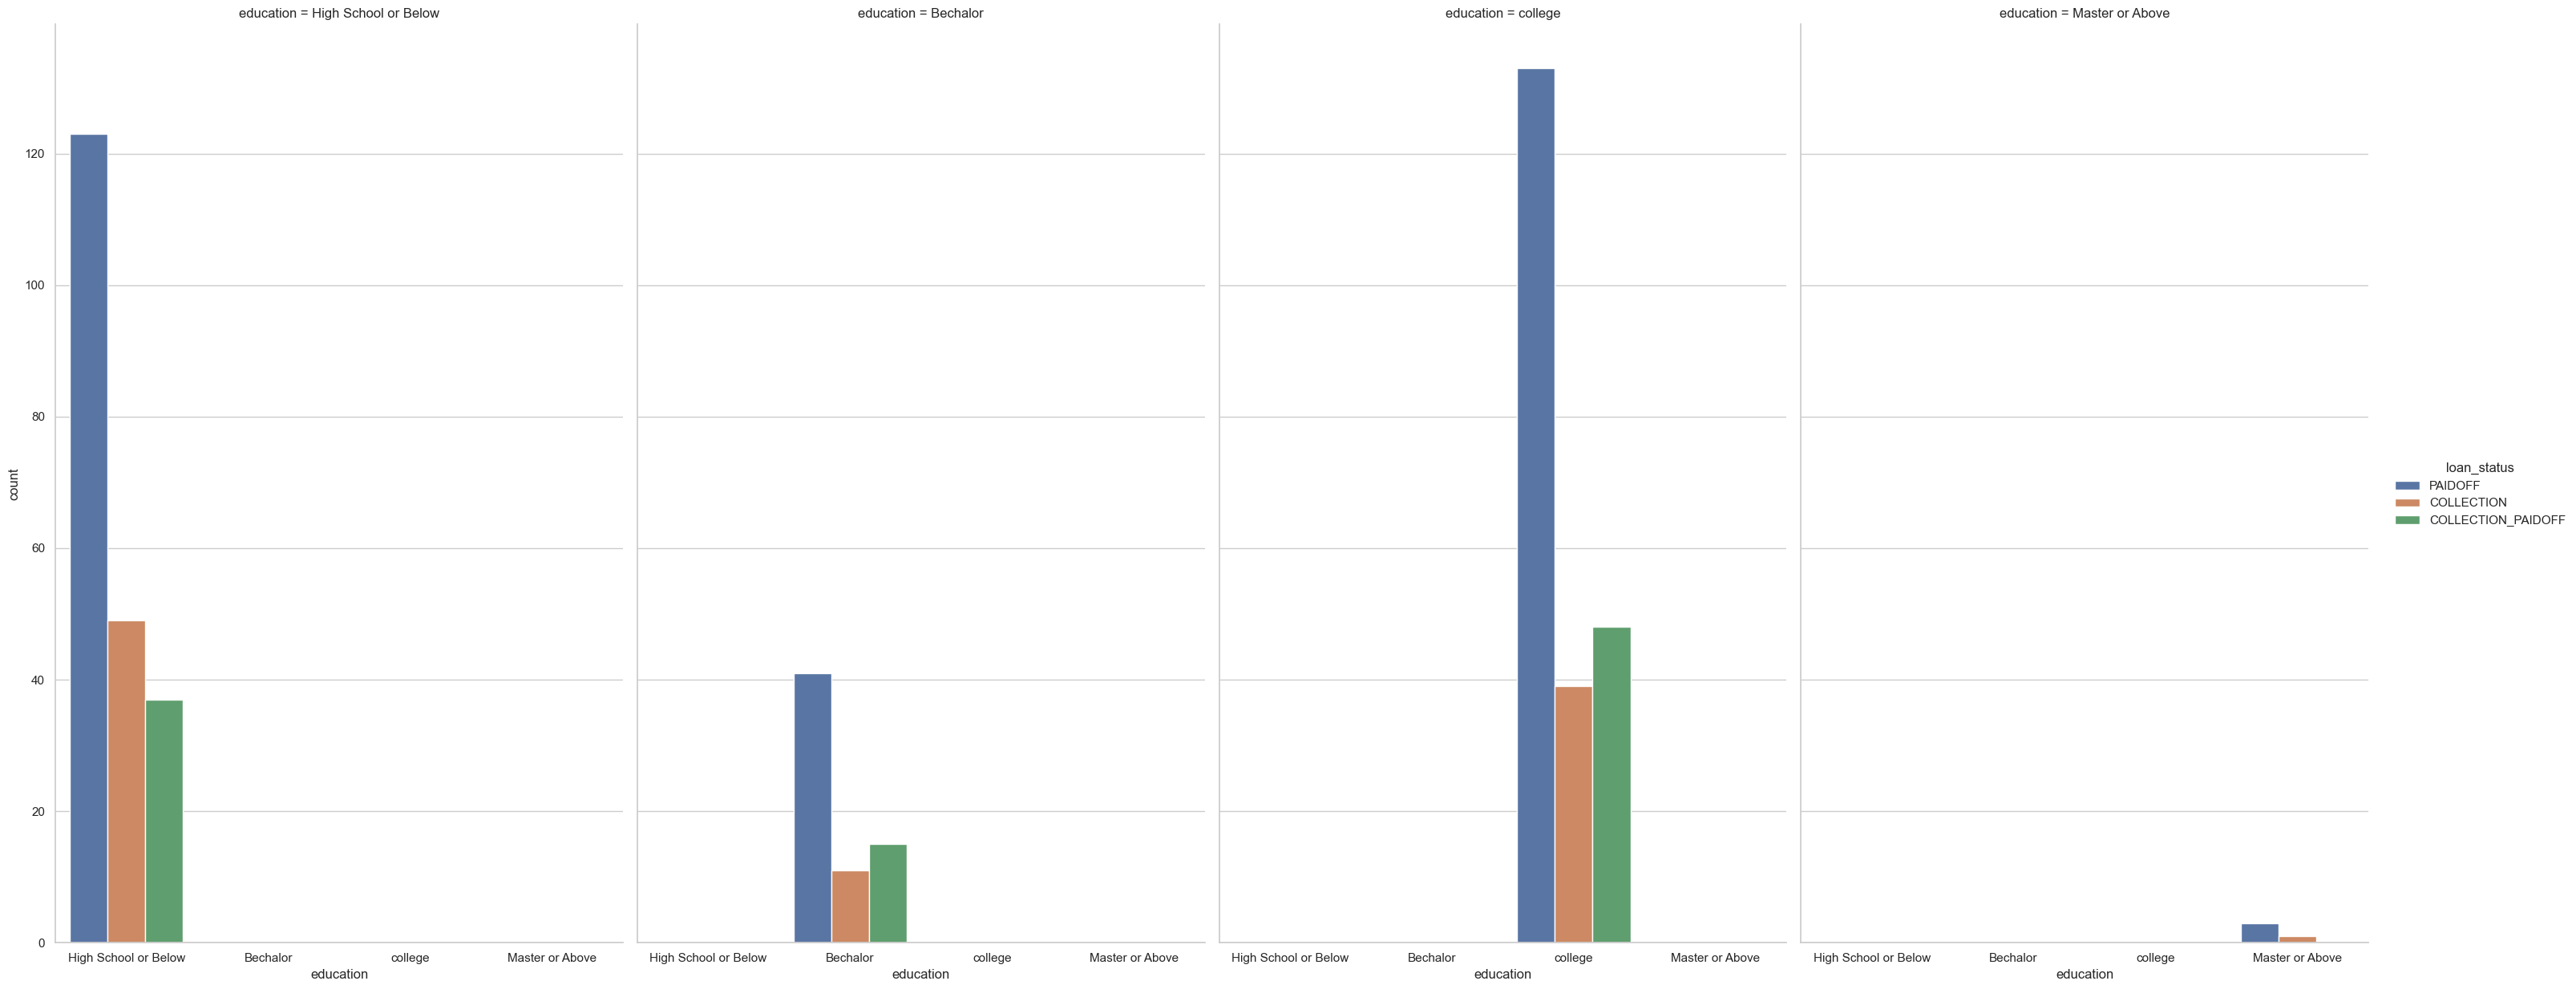

In [24]:
#Loan status by education level
g = sns.catplot(x="education", hue="loan_status", col="education", col_wrap=4,
                data=loan_df[loan_df['loan_status'].notnull()],
                kind="count", height=12.5, aspect=.6)


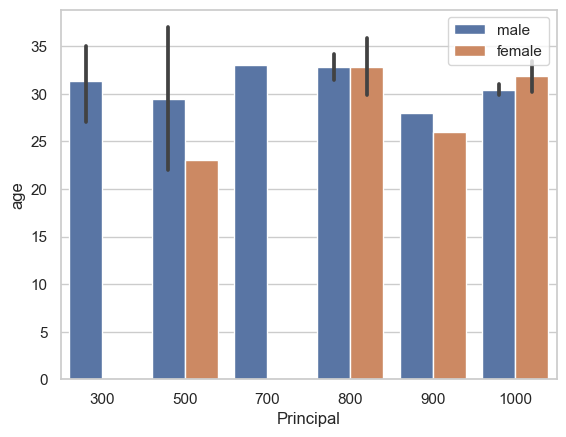

In [29]:
#Age vs principal amount based on gender
ax4 = sns.barplot(x="Principal", y="age",hue="Gender" , data=loan_df)
ax4.legend(loc="upper right")

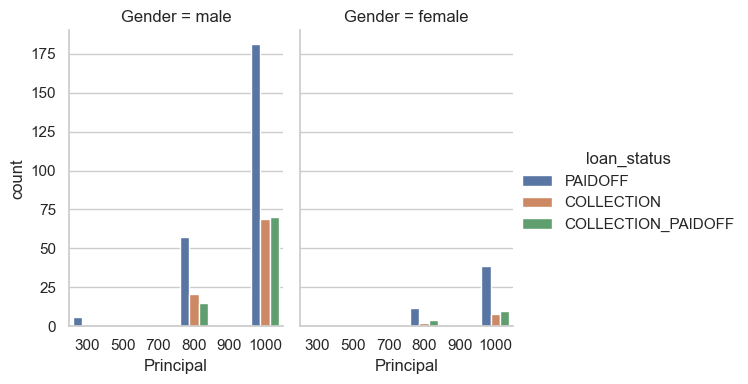

In [40]:
#Loan application counts for each gender 
g = sns.catplot(x='Principal', hue='loan_status', col='Gender', palette='deep', data=loan_df, kind='count',
                height=4, aspect=.7)
#The below graph shows that the male candidates do have more Loan applications compared
#to their female counterparts. And 

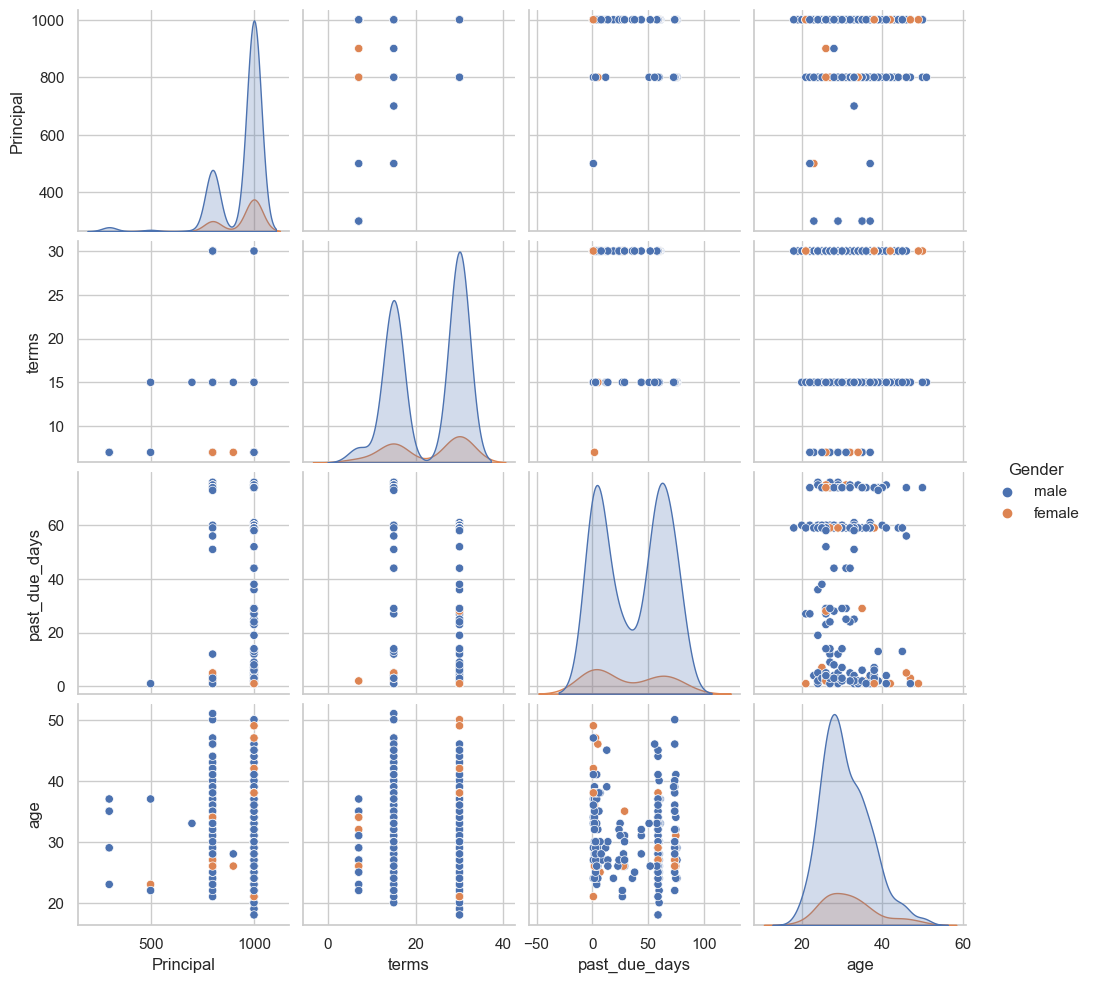

In [41]:
# Draw a pairplot to see data visualisation from different variables in the dataset
sns.pairplot(loan_df, hue='Gender')

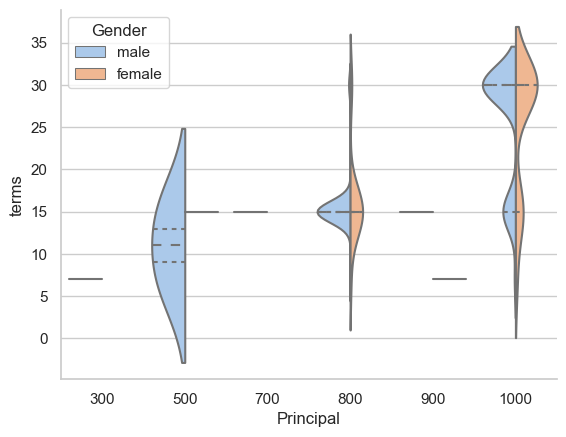

In [46]:
#Use a violin plot to show the distribution of terms across different levels of both the principal and gender variable
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="Principal", y="terms", hue="Gender",split=True, inner="quart", data=loan_df)
sns.despine(left=False)

#From the below violin plot, female candidates did not apply for loan at principal 500. Only male candidates applied for
#principal range 400-500. Female candidates apply for Principal amount starting with 800 and apply for most of application
#having principal amount = 1000


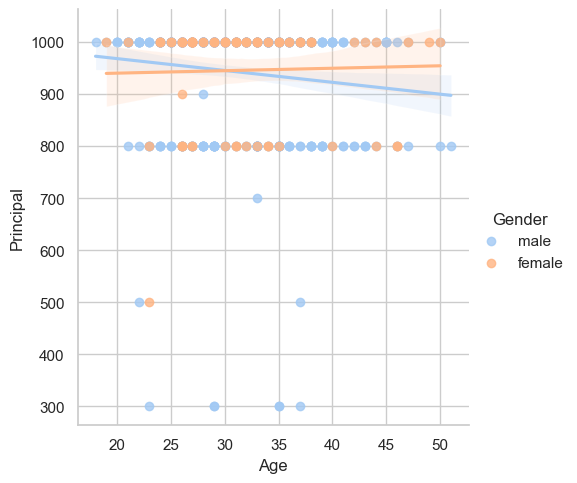

In [47]:
#Use a linear model plot to visualize the distribution of loan applications to age
g = sns.lmplot(x="age", y="Principal", hue="Gender",truncate=True, height=5, data=loan_df)
g.set_axis_labels("Age", "Principal")


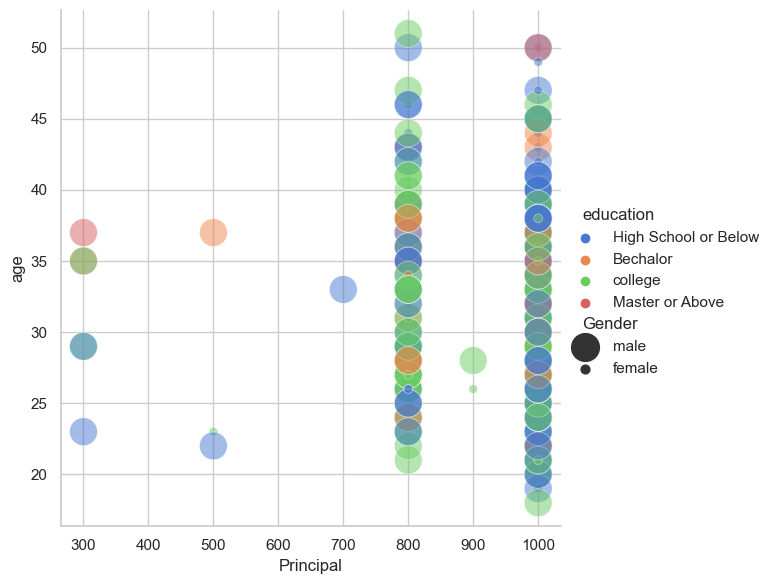

In [48]:
# Use a relplot from seaborn to tell the relationship between age, principal, education and the data spread
sns.relplot(x="Principal", y="age", hue="education", size="Gender",sizes=(40, 400), alpha=.5,
            palette="muted",height=6, data=loan_df)
# From the below graph, most peoeple apply for loan amounts at principal of 800 and 1000

In [50]:
#How many people applied and paid off before due date
loan_df['past_due_days'].isnull().sum()

#From the result, below 300 applicants paid off their loans before due date

300

In [51]:
#Find defaulting applicants that paid off their loans after due date
default_candidates = (loan_df.shape[0] - loan_df['past_due_days'].isnull().sum())/ (loan_df.shape[0]) * 100
print(f'{default_candidates}% of candidates paid past due time')

40.0% of candidates paid past due time


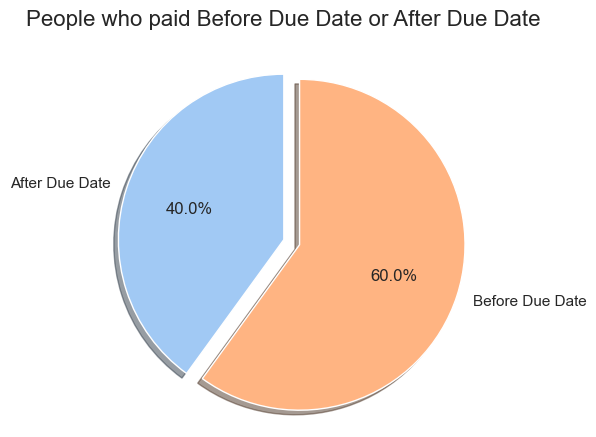

In [52]:
#Use a pie chart for visualizing candidates that paid before and after the due date
labels = 'After Due Date', 'Before Due Date'
sizes = [default_candidates, 100 - default_candidates]
explode = (0, 0.1) #only "explode" the second slice

#Create a figure and axis 
fig1, ax1=plt.subplots()

#Plot the pie chart
ax1.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
#Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
fig1.suptitle('People who paid Before Due Date or After Due Date', fontsize=16)

# Display the pie chart
plt.show()

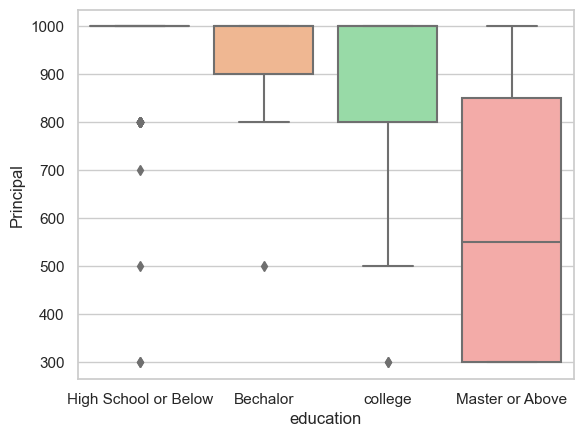

In [53]:
#Use a boxplot display the distribution of principals per education level
sns.boxplot(x = 'education', y = 'Principal', data= loan_df)
plt.show()

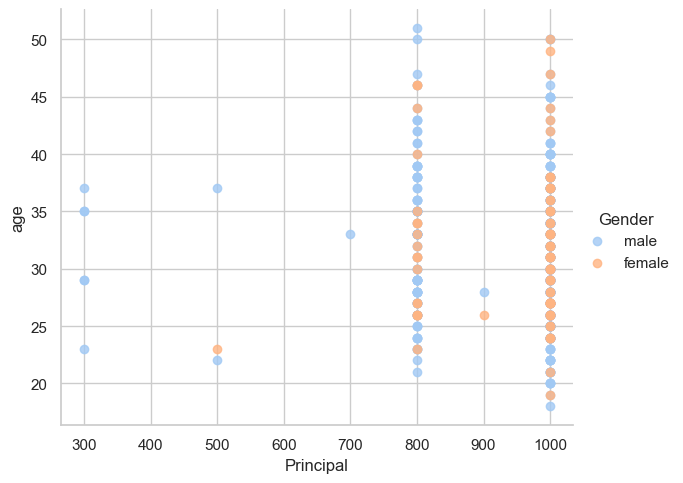

In [57]:
#Use a lmplot to display the distribution of age wih respect to principal using gender as the other categorical variable
sns.lmplot(x = 'Principal', y = 'age', hue='Gender', aspect=1.2, data=loan_df, fit_reg=False)
#Below is just another visualisation showing both male and female applicants who are going for higher education apply for Principal amount of 800 or 1000

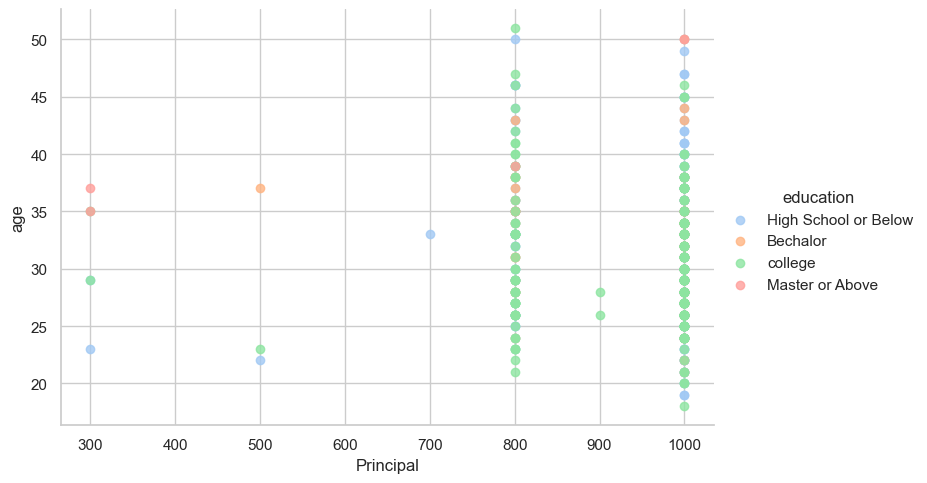

In [59]:
sns.lmplot(x='Principal', y='age', hue = 'education', data=loan_df, aspect=1.5, fit_reg = False)
plt.show()

#The graph below shows that most applicants that apply for loans with principal 800-1000 and majority of students apply for loan
# at principal 1000 are college students.

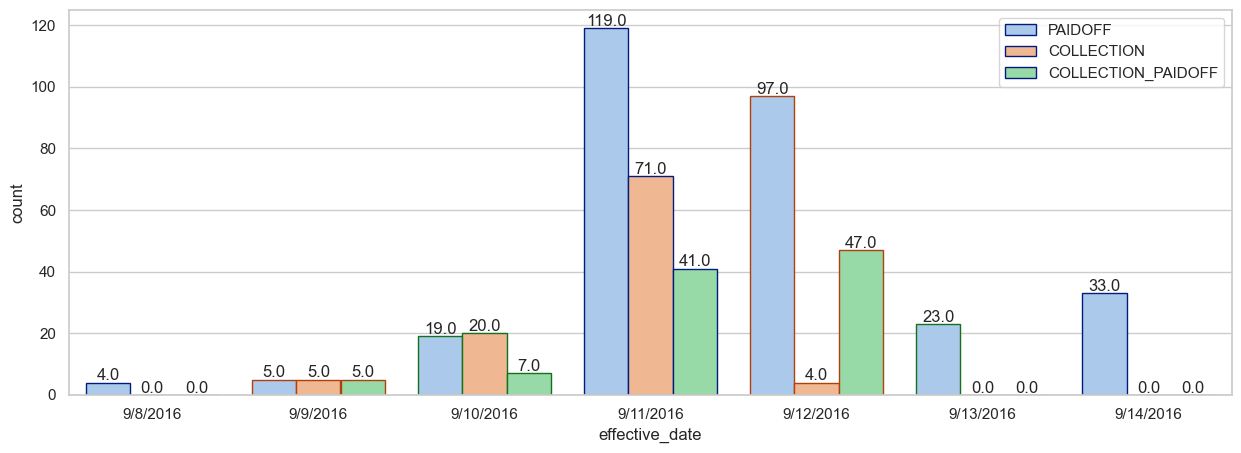

In [66]:
#Let's investigate why most students applied for loan at 11th september , 2016
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="effective_date", hue="loan_status", data=loan_df ,palette='pastel' , edgecolor=sns.color_palette("dark", 3))
ax.legend(loc='upper right')

#annonate text to each bar in the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
#The graph belows displays that majority of the candidates applied for loans at 9/11/2016 and majority of
#the candidates in collections, also applied on 9/11/2016

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x="due_date", hue="loan_status", data=loan_df ,palette='pastel' , edgecolor=sns.color_palette("dark", 3))
ax.legend(loc='upper right')

#annonate text to each bar in the plot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
